<a href="https://colab.research.google.com/github/Steven-Macas/random-forest/blob/main/randomForest_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Random Forest

*   El preproceso
*   Entrenamiento y predicción
*   evaluación
*   optimización de hiperparámetros
*   Usando GridSearchCV y/o RandomizedSearchCV

## Librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

## Cargar Dataset

In [ ]:
data = pd.read_csv('day.csv')

## Preproceso

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [ ]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Verificar si hay valores nulos
print(data.isnull().any())#True->Null

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


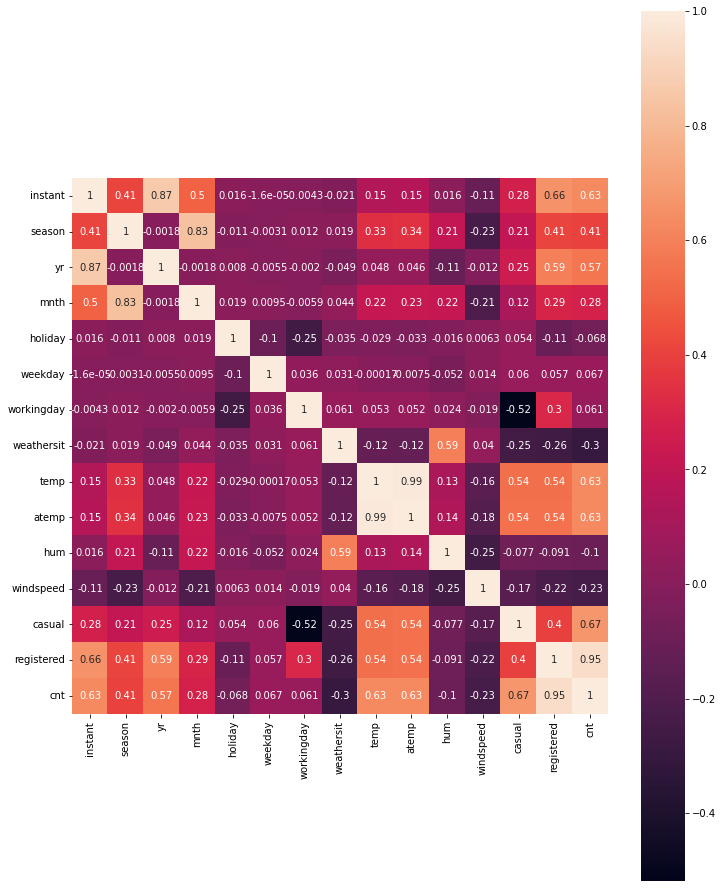

In [ ]:
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

In [ ]:
#Antes de crear nuestro modelo de arbol, nos va a dar error por la fecha, por lo tanto o lo eliminamos o lo ponemos en un sitio de referencia, por ejemplo en el indice:
data['dteday'] = pd.to_datetime(data['dteday'],errors='coerce')
data.set_index('dteday', inplace=True)
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [ ]:
#Separamos las carracterísticas de train y test
train = data.drop('cnt',axis=1)
test = data['cnt']

In [ ]:
#Reseteamos el index con el fin de no evitar problemas en la visualización cruzada
train.reset_index(drop = True, inplace = True)

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(train,test,train_size=0.80,random_state=1)

In [ ]:
model = RandomForestRegressor()

In [ ]:
param = {
    'criterion': ['squared_error','absolute_error'],
    'n_estimators': [100,256,512],
    'max_features':['sqrt','auto'],
    'bootstrap':[True,False],
    'random_state':[1],
    'n_jobs':[1]
}

In [ ]:
grid = GridSearchCV(model, param, cv=5)

## Entrenamiento

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'auto'],
                         'n_estimators': [100, 256, 512], 'n_jobs': [1],
                         'random_state': [1]})

## Evaluación

In [ ]:
predict = model_best.predict(x_test)

In [ ]:
mean_squared_error(y_test,predict)

16139.876894710826

In [ ]:
mean_absolute_error(y_test,predict)

75.00915444302721

## Gráfica de Evaluación

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

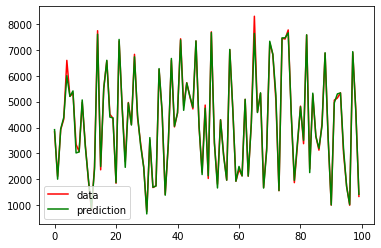

In [ ]:
xx = np.stack(i for i in range(100))
plt.plot(xx,y_test[:100], c = 'r', label = 'data')
plt.plot(xx,predict[:100], c = 'g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt

## Características del modelo

In [ ]:
for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":", model_best.feature_importances_[i])

instant : 0.014782241862862106
season : 0.00018500644344960975
yr : 0.0001788914684310205
mnth : 0.00044669024383213864
holiday : 3.507053129406635e-05
weekday : 0.0005441521936874254
workingday : 0.0004015855507383485
weathersit : 9.971557563207359e-05
temp : 0.0009865739563291573
atemp : 0.0011313649321176324
hum : 0.0007658818843477223
windspeed : 0.0007682897792901049
casual : 0.0928321775589115
registered : 0.8868423580190772


## Adaboost

In [ ]:
grid.best_estimator_

RandomForestRegressor(n_estimators=512, n_jobs=1, random_state=1)

Nos guardamos los hiperparámetros para mejorarlo con Adaboost

In [ ]:
model_best = grid.best_estimator_

In [ ]:
#AdaBoost
param = {'n_estimators':[50],
              'random_state': [1],
              'learning_rate': [0.3],
              }
model_adaboost = AdaBoostRegressor(base_estimator=model_best)

grid = GridSearchCV(model_adaboost, param)

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=512,
                                                                              n_jobs=1,
                                                                              random_state=1)),
             param_grid={'learning_rate': [0.3], 'n_estimators': [50],
                         'random_state': [1]})

In [ ]:
model_adaboost_best = grid.best_estimator_

In [ ]:
predict = model_adaboost_best.predict(x_test)

In [ ]:
mean_squared_error(y_test,predict)

14151.477534028138

In [ ]:
mean_absolute_error(y_test,predict)

68.44499362244898

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

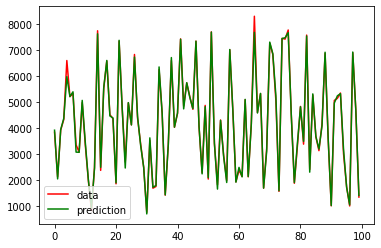

In [ ]:
xx = np.stack(i for i in range(100))
plt.plot(xx,y_test[:100], c = 'r', label = 'data')
plt.plot(xx,predict[:100], c = 'g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt



---

